In this notebook we do:
- Analyze (and plot) the goodness value of the dataset
- From a physics run, read the electron generation dataset and plot some physical quantity (here, electron count) against Dazzler coefficients

Thias will generat the two figures from `Figure 1` in the manuscript

## 1) GOODNESS ANALYSIS
We analyze the input dataset from 240918 dataset to visualize goodness in the parameter space.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [6]:
filename_240918='datasets/pulse_and_dazzler_240918.h5'
df_input_240918=pd.read_hdf(filename_240918,'df_input')

In [3]:
df_input_240918.head()

,shot number,order2,order3,order4,goodness
0,163165,34400.0,-23000.0,-5500000.0,0.945039
1,163166,34400.0,-23000.0,-5500000.0,0.862834
2,163167,34400.0,-23000.0,-5500000.0,0.834347
3,163168,34400.0,-23000.0,-5500000.0,0.873099
4,163169,34400.0,-23000.0,-5500000.0,0.851336


In [4]:
#Dazzler reference values (used in 240918 dataset)
beta2=35000
beta3=0
beta4=-4.5e6

In [5]:
#define a threshold for goodness
goodness_val=1.3

In [6]:
#define a set with the good and bad goodness shots
df_input_240918_good=df_input_240918[df_input_240918['goodness']>=goodness_val]
df_input_240918_bad=df_input_240918[df_input_240918['goodness']<goodness_val]

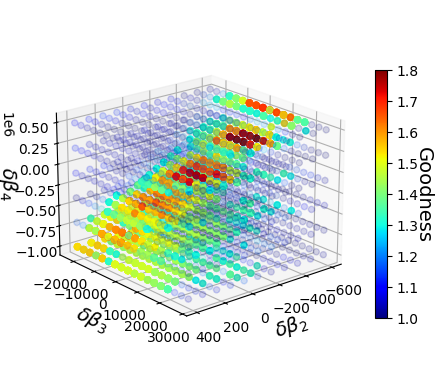

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot_3d= ax.scatter(df_input_240918_good['order2']-beta2, df_input_240918_good['order3']-beta3, df_input_240918_good['order4']-beta4,c=df_input_240918_good['goodness'],
                    cmap='jet',vmin=1.0,vmax=1.8)
ax.scatter(df_input_240918_bad['order2']-beta2, df_input_240918_bad['order3']-beta3, df_input_240918_bad['order4']-beta4,c=df_input_240918_bad['goodness'],
                    cmap='jet',vmin=1.0,vmax=1.8,alpha=0.02)
ax.set_xlabel(r'$\delta\beta_2$',fontsize=14)
ax.set_ylabel(r'$\delta\beta_3$',fontsize=14)
ax.set_zlabel(r'$\delta\beta_4$',fontsize=14)
ax.view_init(elev=20., azim=50)
#plt.title('Goodness')
cbar = plt.colorbar(plot_3d,fraction=0.025, pad=-0.01)
cbar.ax.set_ylabel('Goodness', rotation=270,labelpad=10,fontsize=14)
ax.set_box_aspect(None, zoom=0.85)
plt.show()
#crop the figure with any online tool to remove the boundaries

## 2)Analysis of physical results
In this section we analyze a different experimental run (taken at the same day). The electron generation  was measured doing a similar scan of Dazzler parameters. Gil Collins shared the results in a *Google Sheet* thas was saved in a csv file

The csv needs to be clean before plotting

In [8]:
#read Gil's data from 2409018 physics run
df_phys_run=pd.read_csv('datasets/2024_09_18_physicsrun - 20240918_inshot_tempcorrected.csv')

In [9]:
df_phys_run.head()

,Export Page Cols:,O2,O3,O4,Temp Adj ROI,Temp Adj ROI SD,Temp Adj Max,Temp Adj Max SD,Max eV,Max eV SD,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,NORMALIZED ENERGY,NORMALIZED FLUX
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,SN,Temp (C),TimeStamp,Mean ROI,Max ROI,Energy,BG Subtracted Value,BG Raw Value,Integrated under Lineout,...,Standard Dev (SD),O3,Standard Dev (SD),O4,Standard Dev (SD),Reps per setting,Centroid SRSI,Centroid SRSI SD,NaN,NaN
3,NaN,176264,77,16:06:00,11.75887664,37.21437143,0.61525,33.76562857,204.2520286,27078.3274,...,0,1.10E+04,0,-5.35E+06,0,5,805.626,0.279636,0.778216,49.938681
4,NaN,176263,77,16:05:58,14.1277562,41.54328571,0.560818,33.55671429,204.0431143,32535.637,...,0,3.00E+03,0,-5.05E+06,0,5,807.423,0.499123,0.684162,126.930606


In [10]:
#drop first two rows
df_phys_run=df_phys_run.drop([0,1])
#rename columns by the values in the first row
new_list_columns=df_phys_run.iloc[0].to_list()
df_phys_run.columns =new_list_columns
#and drop that first row
df_phys_run=df_phys_run.drop([2])
 

In [11]:
df_phys_run.head()

,NaN,SN,Temp (C),TimeStamp,Mean ROI,Max ROI,Energy,BG Subtracted Value,BG Raw Value,Integrated under Lineout,...,Standard Dev (SD),O3,Standard Dev (SD),O4,Standard Dev (SD),Reps per setting,Centroid SRSI,Centroid SRSI SD,NaN,NaN
3,NaN,176264,77,16:06:00,11.75887664,37.21437143,0.61525,33.76562857,204.2520286,27078.3274,...,0,1.10E+04,0,-5.35E+06,0,5,805.626,0.279636,0.778216,49.938681
4,NaN,176263,77,16:05:58,14.1277562,41.54328571,0.560818,33.55671429,204.0431143,32535.637,...,0,3.00E+03,0,-5.05E+06,0,5,807.423,0.499123,0.684162,126.930606
5,NaN,176262,77,16:05:55,15.53008532,45.13946032,0.629348,33.64053968,204.1269397,35765.90711,...,0,-1.30E+04,0,-4.75E+06,0,5,808.648,0.217332,0.341580,249.248672
6,NaN,176261,77,16:05:53,11.46338408,35.79184762,0.651898,33.48815238,203.9745524,26397.22507,...,0,-9.00E+03,0,-4.45E+06,0,5,807.003,0.247062,0.560150,80.661810
7,NaN,176260,77,16:05:50,10.70539742,34.6266127,0.560818,33.4933873,203.9797873,24651.43904,...,0,-1.30E+04,0,-4.45E+06,0,5,805.218,0.209279,0.621109,58.445603


In [12]:
#create a new dataframe with only the columns we need
df_clean=df_phys_run[['Mean ROI','Max ROI','Integrated under Lineout','Ordern 2','Order 3','Order 4']]
#drop all rows with nan values
df_clean=df_clean.dropna()
df_clean.rename(columns={'Ordern 2':'Order 2'}, inplace=True) #fix typo in column name

In [13]:
df_clean.head()

,Mean ROI,Max ROI,Integrated under Lineout,Order 2,Order 3,Order 4
3,11.75887664,37.21437143,27078.3274,34800,11000,-5350000
4,14.1277562,41.54328571,32535.637,34800,11000,-5350000
5,15.53008532,45.13946032,35765.90711,34800,11000,-5350000
6,11.46338408,35.79184762,26397.22507,34800,11000,-5350000
7,10.70539742,34.6266127,24651.43904,34800,11000,-5350000


In [14]:
#change types of columns to float
df_clean['Mean ROI']=df_clean['Mean ROI'].astype(float)
df_clean['Max ROI']=df_clean['Max ROI'].astype(float)
df_clean['Integrated under Lineout']=df_clean['Integrated under Lineout'].astype(float)
df_clean['Order 2']=df_clean['Order 2'].astype(int)
df_clean['Order 3']=df_clean['Order 3'].astype(int)
df_clean['Order 4']=df_clean['Order 4'].astype(int)

In [15]:
#average values with same order 2, 3, and 4
df_avg=df_clean.groupby(['Order 2','Order 3','Order 4']).mean().reset_index()

#### Look for best comporession value

In [16]:
#define a reference shot close to the FTL best compression shot (o2=35000, o3=0, and o4=-4.5e6)
df_avg[(df_avg['Order 2']==35000) &
(df_avg['Order 3']>-2000) & (df_avg['Order 3']<2000)]

,Order 2,Order 3,Order 4,Mean ROI,Max ROI,Integrated under Lineout
415,35000,-1000,-5350000,11.485621,32.048980,26456.759674
416,35000,-1000,-5050000,15.754907,42.340332,36285.628740
417,35000,-1000,-4750000,33.408550,75.581732,76955.986944
418,35000,-1000,-4450000,29.482824,66.527815,67910.082492
419,35000,-1000,-4150000,24.571860,57.919528,56602.857570


In [17]:
#define the ref values
index=418
mean_roi_ref=df_avg.iloc[index]['Mean ROI']
max_roi_ref=df_avg.iloc[index]['Max ROI']
int_lineout_ref=df_avg.iloc[index]['Integrated under Lineout']
print('Reference Mean ROI:',mean_roi_ref)

Reference Mean ROI: 29.482823919999998


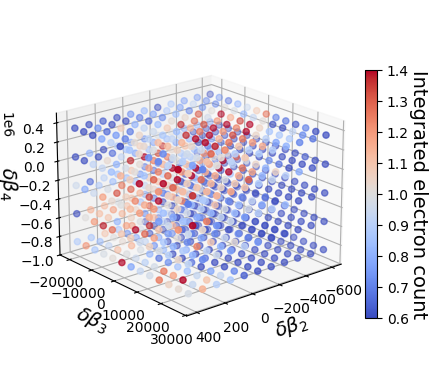

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot_3d= ax.scatter(df_avg['Order 2']-beta2, df_avg['Order 3']-beta3, df_avg['Order 4']-beta4,
c=df_avg['Integrated under Lineout']/int_lineout_ref,cmap='coolwarm',vmin=0.6,vmax=1.4)

#add a big single point for the reference shot
#ax.scatter(0,0,0,color='black',s=200,marker='s')

ax.set_xlabel(r'$\delta\beta_2$',fontsize=14)
ax.set_ylabel(r'$\delta\beta_3$',fontsize=14)
ax.set_zlabel(r'$\delta\beta_4$',fontsize=14)
ax.view_init(elev=20., azim=50)
#change z axis to scientific notation
ax.zaxis.get_major_formatter().set_scientific(True)
ax.zaxis.get_major_formatter().set_powerlimits((0, 1))

#set the z limits (to be the same as in the paper)
ax.set_zlim(-1e6,0.5e6)

cbar = plt.colorbar(plot_3d,fraction=0.025, pad=-0.03)
cbar.ax.set_ylabel('Integrated electron count', rotation=270,labelpad=14,fontsize=14)
ax.set_box_aspect(None, zoom=0.85)

# 3) Analysis of pulse variability

In [7]:
#read the Dazller input data
df_input=pd.read_hdf(filename_240918,'df_input')

#read the reconstructed pulse data
df_time_200=pd.read_hdf(filename_240918,'df_time_200')
df_pulse_200=pd.read_hdf(filename_240918,'df_pulse_200')
t_200=df_time_200.to_numpy()

In [8]:
#Average shots with same input param
def shot_average(df_input,df_pulse):
    goodness_list=[]
    o2_list=[]
    o3_list=[]
    o4_list=[]
    #wizz_list=[]
    goodness_mean=[]
    wizz_mean=[]
    wizz_std=[]
    #emax_std=[]
    counter=0
    for index,row in df_input.iterrows():
        o2=row['order2']
        o3=row['order3']
        o4=row['order4']
        #print(index)
        if(index==0):
            goodness_list.append(row['goodness'])
            wizz_list=df_pulse.iloc[index].to_numpy()
            #print(wizz_list)
            counter=1
        if(index>0):
            o2_prev=df_input['order2'].iloc[index-1]
            o3_prev=df_input['order3'].iloc[index-1]
            o4_prev=df_input['order4'].iloc[index-1]
            if(o2==o2_prev and o3==o3_prev and o4==o4_prev):
                counter+=1
                goodness_list.append(row['goodness'])
                wizz_list=np.vstack([wizz_list,df_pulse.iloc[index].to_numpy()])
                #print(wizz_list)
                #ecut_list.append(df_metrics['Cutoff E'].iloc[index])
                #integ_list.append(df_metrics['Integr norm'].iloc[index])
            else:
                #do the avg (from the previous shots)
                goodness_mean.append(np.mean(goodness_list))
                wizz_mean.append(np.mean(wizz_list,axis=0))
                wizz_std.append(np.mean(np.std(wizz_list,axis=0)))
                ##print(wizz_mean)
                ##print(counter)
                #emax_std.append(np.std(emax_list))
                #ecut_mean.append(np.mean(ecut_list))
                #ecut_std.append(np.std(ecut_list))
                o2_list.append(o2_prev)
                o3_list.append(o3_prev)
                o4_list.append(o4_prev)
                
                #AND start the new batch
                goodness_list=[row['goodness']]
                wizz_list=df_pulse.iloc[index].to_numpy()
                #ecut_list=[df_metrics['Cutoff E'].iloc[index]]
                #integ_list=[df_metrics['Integr norm'].iloc[index]]
                #print(counter)
                counter=1
            #print(counter)

    df_input_avg=pd.DataFrame()
    df_time_avg=pd.DataFrame(wizz_mean)
    df_input_avg['order2']=o2_list
    df_input_avg['order3']=o3_list
    df_input_avg['order4']=o4_list
    df_input_avg['goodness mean']=goodness_mean
    df_input_avg['pulse shape std']=wizz_std
    #df_metrics_avg['Emax std']=emax_std
    return df_input_avg,df_time_avg

In [9]:
df_input_avg,df_time_avg=shot_average(df_input_240918,df_pulse_200)

In [10]:
df_input_avg.head()

,order2,order3,order4,goodness mean,pulse shape std
0,34400.0,-23000.0,-5500000.0,0.863652,0.004069
1,34400.0,-23000.0,-5200000.0,0.969892,0.007376
2,34400.0,-23000.0,-4900000.0,1.197340,0.043940
3,34400.0,-23000.0,-4600000.0,1.265565,0.034602
4,34400.0,-23000.0,-4300000.0,1.102407,0.012280


In [11]:
#average all points std deviation for different goodness thresholds
df_input_avg[df_input_avg['goodness mean'] > 1.4]['pulse shape std'].mean()
list_avg_means = [df_input_avg[df_input_avg['goodness mean'] > 1.0]['pulse shape std'].mean(),
                  df_input_avg[df_input_avg['goodness mean'] > 1.05]['pulse shape std'].mean(),
                  df_input_avg[df_input_avg['goodness mean'] > 1.1]['pulse shape std'].mean(),
                  df_input_avg[df_input_avg['goodness mean'] > 1.15]['pulse shape std'].mean(),
                  df_input_avg[df_input_avg['goodness mean'] > 1.2]['pulse shape std'].mean(),
                  df_input_avg[df_input_avg['goodness mean'] > 1.25]['pulse shape std'].mean(),
                  df_input_avg[df_input_avg['goodness mean'] > 1.3]['pulse shape std'].mean(),
                  df_input_avg[df_input_avg['goodness mean'] > 1.35]['pulse shape std'].mean(),
                  df_input_avg[df_input_avg['goodness mean'] > 1.4]['pulse shape std'].mean(),
                  df_input_avg[df_input_avg['goodness mean'] > 1.5]['pulse shape std'].mean(),
                  df_input_avg[df_input_avg['goodness mean'] > 1.6]['pulse shape std'].mean(),
                  ]
goodness_list = [1.0,1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.5,1.6]

## Analysis of ML accuracy and goodness

In [13]:
def create_dataset(goodness,df_input,df_pulse):
    df_input_reduced=df_input[df_input['goodness']>goodness]

    good_shots_list=df_input_reduced.index.values

    df_pulse_reduced=df_pulse.iloc[good_shots_list]

    #reset the index
    df_input_reduced.reset_index(inplace=True,drop=True)
    df_pulse_reduced.reset_index(inplace=True,drop=True)
    return df_input_reduced,df_pulse_reduced

In [14]:
df_input_reduced_100,df_pulse_reduced_100=create_dataset(1.00,df_input_240918,df_pulse_200)
df_input_reduced_105,df_pulse_reduced_105=create_dataset(1.05,df_input_240918,df_pulse_200)
df_input_reduced_110,df_pulse_reduced_110=create_dataset(1.10,df_input_240918,df_pulse_200)
df_input_reduced_115,df_pulse_reduced_115=create_dataset(1.15,df_input_240918,df_pulse_200)
df_input_reduced_120,df_pulse_reduced_120=create_dataset(1.20,df_input_240918,df_pulse_200)
df_input_reduced_125,df_pulse_reduced_125=create_dataset(1.25,df_input_240918,df_pulse_200)
df_input_reduced_130,df_pulse_reduced_130=create_dataset(1.30,df_input_240918,df_pulse_200)
df_input_reduced_135,df_pulse_reduced_135=create_dataset(1.35,df_input_240918,df_pulse_200)
df_input_reduced_140,df_pulse_reduced_140=create_dataset(1.40,df_input_240918,df_pulse_200)
df_input_reduced_150,df_pulse_reduced_150=create_dataset(1.50,df_input_240918,df_pulse_200)
df_input_reduced_160,df_pulse_reduced_160=create_dataset(1.60,df_input_240918,df_pulse_200)

## Train the FWD model

In [18]:
def train_forward(df_input,df_time):
    #split the dataset (X:dazzler param, Y:wizzler)
    X=df_input[['order2','order3','order4']]
    y=df_time
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    #Reset the index on y_test to have the same indexes as y_predict
    y_test_reset=y_test.reset_index(drop=True)

    #train forward model with Random forest
    n_estimators = 300
    max_features = 1.0#'sqrt'
    max_depth=20
    random_state=18

    forward_model_rf=RandomForestRegressor(n_estimators=n_estimators,
                                            max_features=max_features,
                                            max_depth=max_depth,
                                              random_state=random_state)
    forward_model_rf.fit(X_train, y_train)
    y_predict_forward=forward_model_rf.predict(X_test)

    #study the erro distribution
    df_error_forward_rf=abs(y_test_reset-y_predict_forward)
    df_error_forward_rf=df_error_forward_rf.sum(axis=1)/y_test.shape[1] #sum error / num columns

    return forward_model_rf, df_error_forward_rf

In [19]:
fwd_model_100,df_error_fwd_100=train_forward(df_input_reduced_100,df_pulse_reduced_100)
fwd_model_105,df_error_fwd_105=train_forward(df_input_reduced_105,df_pulse_reduced_105)
fwd_model_110,df_error_fwd_110=train_forward(df_input_reduced_110,df_pulse_reduced_110)
fwd_model_115,df_error_fwd_115=train_forward(df_input_reduced_115,df_pulse_reduced_115)
fwd_model_120,df_error_fwd_120=train_forward(df_input_reduced_120,df_pulse_reduced_120)
fwd_model_125,df_error_fwd_125=train_forward(df_input_reduced_125,df_pulse_reduced_125)
fwd_model_130,df_error_fwd_130=train_forward(df_input_reduced_130,df_pulse_reduced_130)
fwd_model_135,df_error_fwd_135=train_forward(df_input_reduced_135,df_pulse_reduced_135)
fwd_model_140,df_error_fwd_140=train_forward(df_input_reduced_140,df_pulse_reduced_140)
fwd_model_150,df_error_fwd_150=train_forward(df_input_reduced_150,df_pulse_reduced_150)
fwd_model_160,df_error_fwd_160=train_forward(df_input_reduced_160,df_pulse_reduced_160)

In [20]:
median_error=[np.median(df_error_fwd_100),
              np.median(df_error_fwd_105),
                np.median(df_error_fwd_110),
                np.median(df_error_fwd_115),
                np.median(df_error_fwd_120),
                np.median(df_error_fwd_125),
                np.median(df_error_fwd_130),
                np.median(df_error_fwd_135),
                np.median(df_error_fwd_140),
                np.median(df_error_fwd_150),
                np.median(df_error_fwd_160)]
goodness_levels=[1.0,1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.5,1.6]

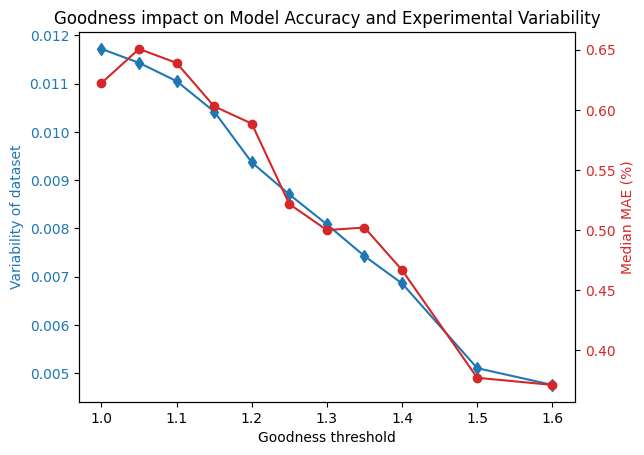

In [22]:
#combine the results in a single plot with twin yaxis
fig, ax1 = plt.subplots()

#ax1.plot(df_input_avg['goodness mean'],df_input_avg['pulse shape std'],'.',color='tab:blue')
ax1.plot(goodness_list,list_avg_means,'d-',color='tab:blue')
ax1.set_ylabel('Variability of dataset', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xlabel('Goodness threshold')

ax2 = ax1.twinx()
ax2.plot(goodness_levels,100*np.array(median_error),'-o',color='tab:red')
ax2.set_ylabel('Median MAE (%)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')



plt.title('Goodness impact on Model Accuracy and Experimental Variability')

# Save figure in EPS format
#plt.savefig('goodness_analysis.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()